In [26]:
from qiskit import *
from qiskit.quantum_info import *
from qiskit.circuit.library import *

import math 

In [27]:
def beta_j_s(j, s, alpha):
    num = math.sqrt(sum([alpha[(((2*j)-1)*(2**(s-1)))+l]**1 for l in range(1,2**(s-1)+1)]))
    den = math.sqrt(sum([alpha[((j-1)*(2**s))+l]**1 for l in range(1,2**s+1)]))
    return (-2*math.asin(num/den) if num else 0)

alpha = [0,0.2,0.5,0.2,0.1,0,0,0,0]
alpha_sqrt = [math.sqrt(i) for i in alpha]
num_qubits = 3

h = {}

s = 1
for i in range(num_qubits):
    total = 2**(num_qubits-s)
    jlist = range(1, total+1)

    for j in jlist:
        h[(s,j)] = beta_j_s(j,s,alpha)
        print (s,j, h[(s,j)])

    s += 1

QC = QuantumCircuit(num_qubits)
QC.initialize(alpha_sqrt[1:], list(range(num_qubits)))
state = Statevector(QC)
state.draw(output="Latex")

1 1 -2.0137073708685356
1 2 -1.2309594173407745
1 3 0
1 4 0
2 1 -1.159279480727409
2 2 0
3 1 0


<IPython.core.display.Latex object>

1 1 -2.0137073708685356 [0, 1]
cond_qubits ->  [] [2]
1 2 -1.2309594173407745 [0, 1]
cond_qubits ->  [1] [2]
1 3 0 [0, 1]
cond_qubits ->  [0] [2]
1 4 0 [0, 1]
cond_qubits ->  [0, 1] [2]
2 1 -1.159279480727409 [0]
cond_qubits ->  [] [1]
2 2 0 [0]
cond_qubits ->  [0] [1]
3 1 0 []
cond_qubits ->  [] [0]


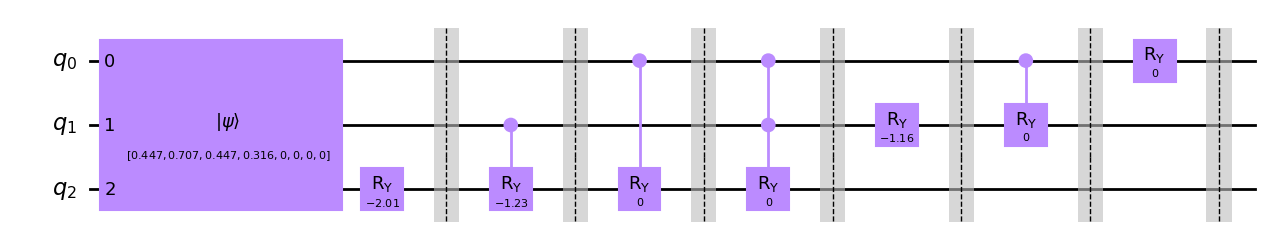

In [28]:
for s in range(1,num_qubits+1):
    for j in range(1, 2**(num_qubits-s)+1):
        print (s,j, h[(s,j)], list(range(0,num_qubits-s)))
        sint = '{:0'+str(num_qubits-s)+'b}'


        cond_qubits = []
        for sj,sp in zip(sint.format(j-1), range(0,num_qubits-s)):
            if sj == '1':
                cond_qubits.append(sp)

        print ('cond_qubits -> ', cond_qubits, list([num_qubits-s]))

        if len(cond_qubits):
            gate = RYGate(h[(s,j)]).control(len(cond_qubits))
            QC.append(gate, cond_qubits+[num_qubits-s])
        else:
            QC.ry(h[(s,j)], num_qubits-s)

        QC.barrier()

QC.draw(output='mpl')

In [29]:
state = Statevector(QC)
state.draw(output="Latex")

<IPython.core.display.Latex object>